# 10/25 17:48

In [30]:
# from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 
from tqdm import tqdm
import matplotlib.image as mpimg
# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model
from keras.applications import InceptionResNetV2

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

# File name preprocessing

In [2]:
path = "/Users/suminbae/PycharmProjects/tf_cv2/aeye"
p_path = "/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons"
# change the working directory to the path where the images are located
os.chdir(p_path)

# this list holds all the image filename
persons = []



In [3]:
# creates a ScandirIterator aliased as files
with os.scandir(p_path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the flowers list
            persons.append(file.name)
            

# Calling model process

In [4]:
model = InceptionResNetV2()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)


# Extracting feature process

In [6]:
model = InceptionResNetV2()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(299,299))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,299,299,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [34]:
data = {}
p = r"CHANGE TO A LOCATION TO SAVE FEATURE VECTORS"

# lop through each image in the dataset
for person in tqdm(persons):
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(person,model)
        data[person] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

100%|██████████| 131/131 [02:00<00:00,  1.08it/s]


# extracting feature 1536

In [35]:
data['frame_8_person_4.jpg'].shape

(1, 1536)

# reshaping 

In [36]:
keys_values = data.items()
new_d = {key: value.reshape(1536) for key, value in keys_values}

In [37]:
images = list(new_d.values())

# Clustering

In [38]:
kmeans = KMeans(n_clusters=5, init='k-means++')

kmeans.fit(images)
y_kmeans = kmeans.predict(images)



In [39]:
kmeans_labels_int = list(kmeans.labels_)
kmeans_labels_int = list(map(int, kmeans_labels_int))

In [40]:
groups = {}

for file, cluster in zip(persons,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [41]:
groups

{4: ['frame_8_person_4.jpg',
  'frame_10_person_3.jpg',
  'frame_9_person_4.jpg',
  'frame_11_person_3.jpg',
  'frame_4_person_5.jpg',
  'frame_3_person_5.jpg',
  'frame_2_person_5.jpg',
  'frame_5_person_5.jpg',
  'frame_7_person_5.jpg',
  'frame_0_person_4.jpg',
  'frame_1_person_4.jpg',
  'frame_6_person_5.jpg',
  'frame_14_person_3.jpg',
  'frame_15_person_3.jpg',
  'frame_12_person_3.jpg',
  'frame_13_person_4.jpg'],
 1: ['frame_10_person_1.jpg',
  'frame_8_person_5.jpg',
  'frame_11_person_4.jpg',
  'frame_9_person_1.jpg',
  'frame_9_person_5.jpg',
  'frame_11_person_1.jpg',
  'frame_8_person_1.jpg',
  'frame_10_person_4.jpg',
  'frame_5_person_1.jpg',
  'frame_2_person_1.jpg',
  'frame_4_person_6.jpg',
  'frame_3_person_6.jpg',
  'frame_3_person_1.jpg',
  'frame_4_person_1.jpg',
  'frame_2_person_6.jpg',
  'frame_5_person_6.jpg',
  'frame_7_person_6.jpg',
  'frame_6_person_1.jpg',
  'frame_1_person_1.jpg',
  'frame_0_person_5.jpg',
  'frame_6_person_6.jpg',
  'frame_0_person_1.j

In [42]:
g1 = groups[1]
g3 = groups[3]
g4 = groups[4]
g0 = groups[0]

/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_10_person_1.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_8_person_5.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_11_person_4.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_9_person_1.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_9_person_5.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_11_person_1.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_8_person_1.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_10_person_4.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_5_person_1.jpg
/Users/suminbae/PycharmProjects/tf_cv2/aeye/persons/frame_2_person_1.jpg


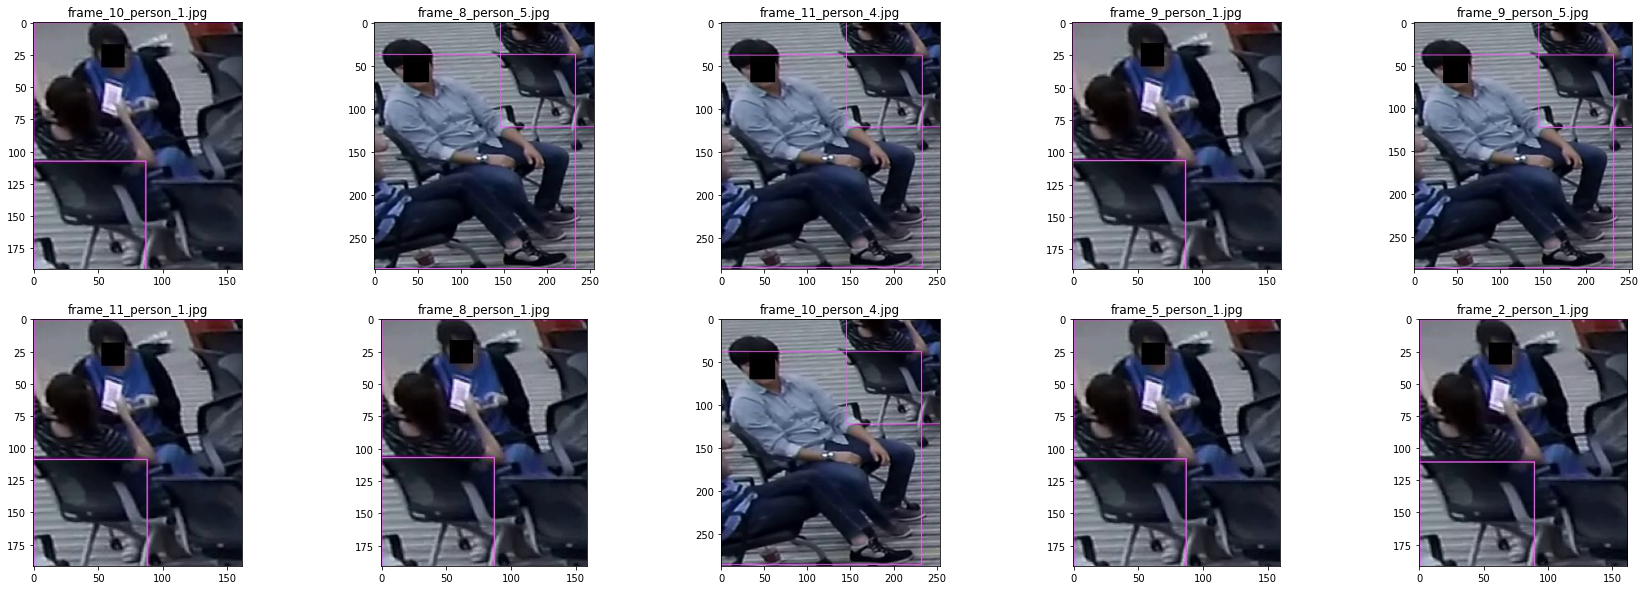

In [63]:
plt.figure(figsize=(30,10))

for i in range(10):
    plt.subplot(2,5,i+1)
    adata = p_path+"/"+g1[i]
    print(adata)
    img = mpimg.imread(adata)
    plt.title(g1[i])
    plt.imshow(img)
    



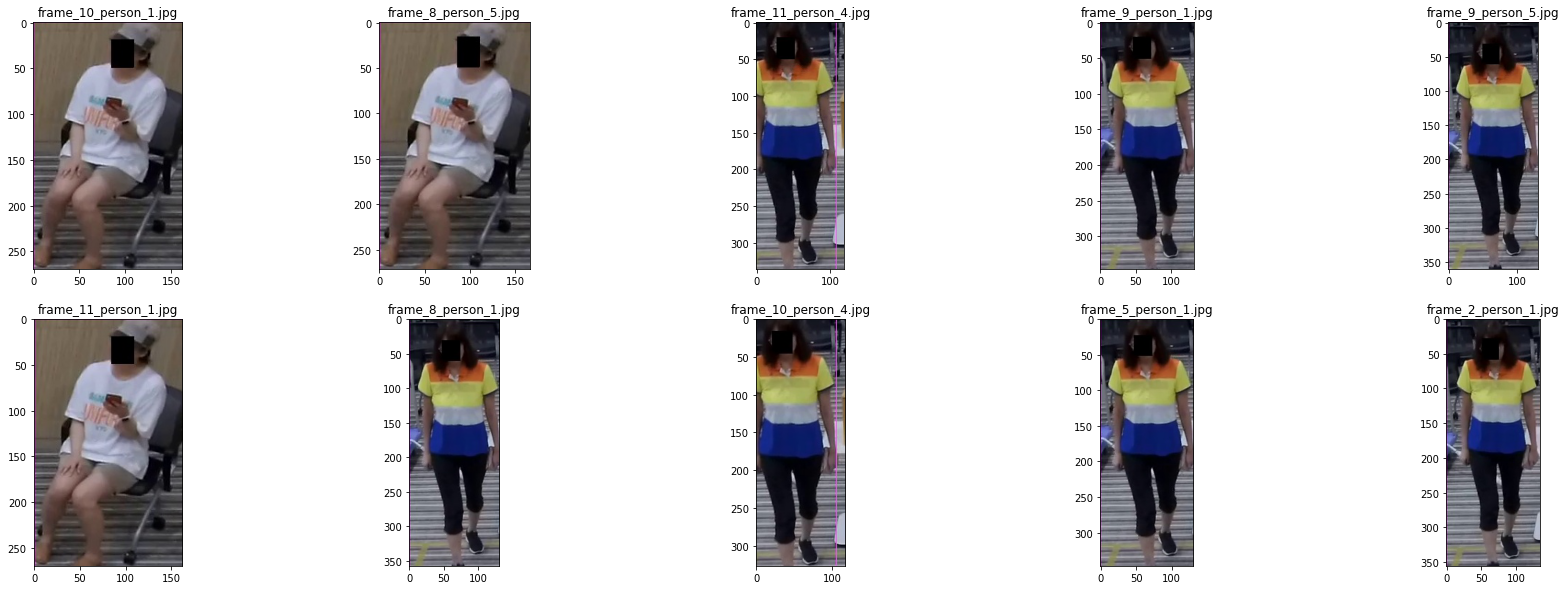

In [45]:
plt.figure(figsize=(30,10))

for i in range(10):
    plt.subplot(2,5,i+1)
    adata = p_path+"/"+g0[i]
    img = mpimg.imread(adata)
    plt.title(g1[i])
    plt.imshow(img)

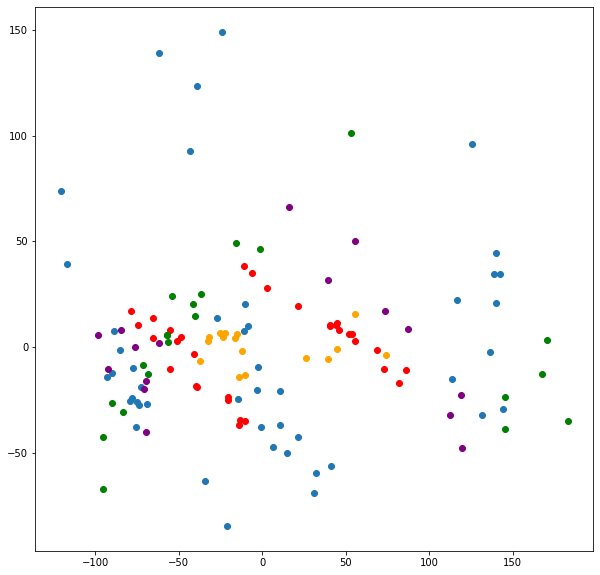

In [61]:
g0_features = []
g1_features = []
g2_features = []
g3_features = []
g4_features = []


for val in groups[0]:
    g0_features.append(data[val])

for val in groups[1]:
    g1_features.append(data[val])
    
for val in groups[2]:
    g2_features.append(data[val])
    
    
for val in groups[3]:
    g3_features.append(data[val])    
    
    
for val in groups[4]:
    g4_features.append(data[val])  
    
a = np.array(g0_features)
a = a.reshape(-1,1536)

b =np.array(g1_features)
b = b.reshape(-1,1536)

c = np.array(g2_features)
c = c.reshape(-1,1536)

d = np.array(g3_features)
d = d.reshape(-1,1536)

e = np.array(g4_features)
e = e.reshape(-1,1536)

pca0 = PCA(n_components=2)
pca1 = PCA(n_components=2)
pca2 = PCA(n_components=2)
pca3 = PCA(n_components=2)
pca4 = PCA(n_components=2)


g0_reduced = pca0.fit_transform(a)
g1_reduced = pca1.fit_transform(b)
g2_reduced = pca2.fit_transform(c)
g3_reduced = pca3.fit_transform(d)
g4_reduced = pca4.fit_transform(e)


plt.figure(figsize=(10,10))
plt.scatter(x=g0_reduced[:,0],y=g0_reduced[:,1:2])
plt.scatter(x=g1_reduced[:,0],y=g1_reduced[:,1:2],c="red")
plt.scatter(x=g2_reduced[:,0],y=g2_reduced[:,1:2],c="green")
plt.scatter(x=g3_reduced[:,0],y=g3_reduced[:,1:2],c="purple")
plt.scatter(x=g4_reduced[:,0],y=g4_reduced[:,1:2],c="orange")